In [2]:
#Librerias 
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil

Found 2679 images belonging to 2 classes.
Found 2683 images belonging to 2 classes.


C:\Users\claud\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.5930 - loss: 0.6526 - val_accuracy: 0.7700 - val_loss: 0.4730
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.7974 - loss: 0.4445 - val_accuracy: 0.8330 - val_loss: 0.3950
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.8300 - loss: 0.4059 - val_accuracy: 0.8580 - val_loss: 0.3636
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.8456 - loss: 0.3642 - val_accuracy: 0.8792 - val_loss: 0.3005
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.8576 - loss: 0.3419 - val_accuracy: 0.8867 - val_loss: 0.2780
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8603 - loss: 0.3246 - val_accuracy: 0.8979 - val_loss: 0.2617
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 787ms/step - accuracy: 0.8768 - loss: 0.3034 - val_accuracy: 0.9005 - val_loss: 0.2406
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 789ms/step - accuracy: 0.8897 - loss: 0.2699 - val_accuracy

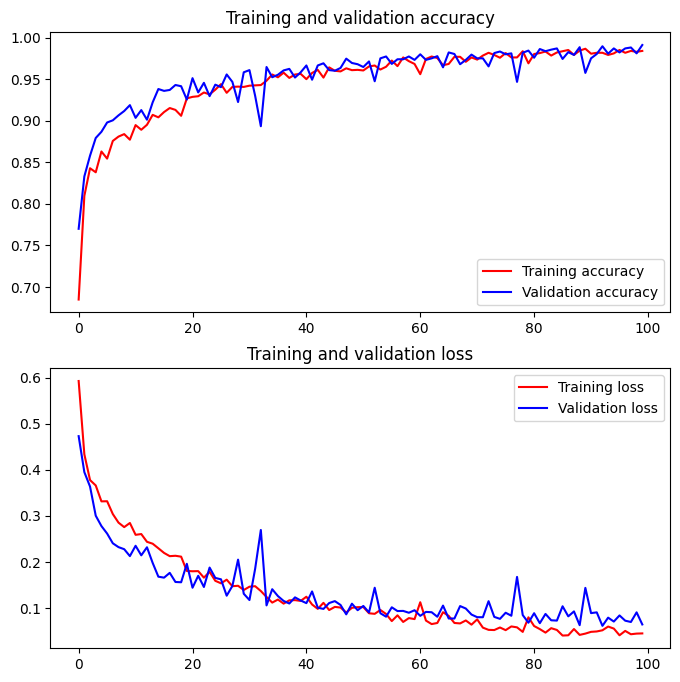

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Directorios de los datos
train_dir = r'C:\Users\claud\OneDrive\Escritorio\Python\Temp\train'
validation_dir = r'C:\Users\claud\OneDrive\Escritorio\Python\Temp\validation'

# Crear generadores de datos con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

# Guardar el modelo
model.save('modelo_manzanas_100.h5')
# Guardar el historial del entrenamiento
import pickle

with open('historial_entrenamiento_100.pkl', 'wb') as f:
    pickle.dump(history.history, f)
    
# Graficar el historial de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')

plt.show()


In [ ]:
# Guardar el historial del entrenamiento
import pickle

with open('historial_entrenamiento.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
#Mediante el modelo guardado 'archivo.h5' se puede probar su eficacia importandole imagenes de manzanas.
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
model = tf.keras.models.load_model('modelo_manzanas_100.h5')

# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalización
    return img_array

# Función para predecir la calidad de la manzana con detalles
def predict_image_quality(img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    confidence = prediction[0][0]
    if confidence > 0.5:
        result = "Mala"
    else:
        result = "Buena"
    return result, confidence
a=r'C:\Users\claud\OneDrive\Escritorio\Python\Temp\train\buena\FreshApple (1).jpg'
b=r'C:\Users\claud\OneDrive\Escritorio\Python\Apple__Healthy\FreshApple (8).jpg'
c=r'C:\Users\claud\OneDrive\Escritorio\Python\Apple__Rotten\rotated_by_15_Screen Shot 2018-06-07 at 2.15.20 PM.png'
# Ruta a la imagen de prueba
# Probar el modelo con nuevas imágenes
# Reemplaza 'path_to_new_image.jpg' con la ruta a tu imagen
test_images = [a, b, c]

# Realizar predicciones y mostrar resultados con detalles
for img_path in test_images:
    result, confidence = predict_image_quality(img_path)
    img = image.load_img(img_path)
    
    # Mostrar la imagen con detalles de predicción
    plt.imshow(img)
    plt.title(f'Predicción: {result}\nConfianza: {confidence:.2f}')
    plt.axis('off')
    plt.show()

    # Información detallada de la predicción
    print(f"Imagen: {img_path}")
    print(f"Predicción: {result}")
    print(f"Confianza: {confidence:.2f}")
    print("-" * 50)
